In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
lockdown_dates = pd.read_csv('countryLockdowndates.csv')

In [3]:
lockdown_dates 

,Country/Region,Province,Date,Type,Reference
0,Afghanistan,NaN,24/03/2020,Full,https://www.thestatesman.com/world/afghan-govt...
1,Albania,NaN,08/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
2,Algeria,NaN,24/03/2020,Full,https://www.garda.com/crisis24/news-alerts/325...
3,Andorra,NaN,16/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
4,Angola,NaN,24/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
...,...,...,...,...,...
302,Venezuela,NaN,16/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
303,Vietnam,NaN,19/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
304,West Bank and Gaza,NaN,05/03/2020,Full,NaN
305,Zambia,NaN,NaN,None,NaN


In [4]:
# Drop NaN Dates

lockdown_dates.dropna(inplace=True)

In [5]:
# Convert Date to DateTime object instead of Str

lockdown_dates['DateTime'] = pd.to_datetime(lockdown_dates['Date'])

In [6]:
# Group DateTime by Week

lockdown_dates['WeekDate'] = lockdown_dates.apply(lambda row: row['DateTime'] - dt.timedelta(days=row['DateTime'].weekday()), axis=1)
lockdown_dates

,Country/Region,Province,Date,Type,Reference,DateTime,WeekDate
14,Australia,Victoria,24/03/2020,Full,https://www.theage.com.au/national/victoria/sc...,2020-03-24,2020-03-23
38,Canada,Alberta,17/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...,2020-03-17,2020-03-16
39,Canada,British Columbia,18/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...,2020-03-18,2020-03-16
40,Canada,Manitoba,20/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...,2020-03-20,2020-03-16
41,Canada,New Brunswick,19/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...,2020-03-19,2020-03-16
...,...,...,...,...,...,...,...
294,US,Virgin Islands,25/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...,2020-03-25,2020-03-23
295,US,Virginia,30/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...,2020-03-30,2020-03-30
296,US,Washington,23/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...,2020-03-23,2020-03-23
297,US,West Virginia,24/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...,2020-03-24,2020-03-23


In [7]:
# Count by Week

count_per_week = lockdown_dates['WeekDate'].groupby(lockdown_dates['WeekDate']).count()
count_per_week

WeekDate
2020-01-20    32
2020-02-03     5
2020-03-02     1
2020-03-09     2
2020-03-16    17
2020-03-23    30
2020-03-30     7
2020-06-01     1
2020-11-30     2
Name: WeekDate, dtype: int64

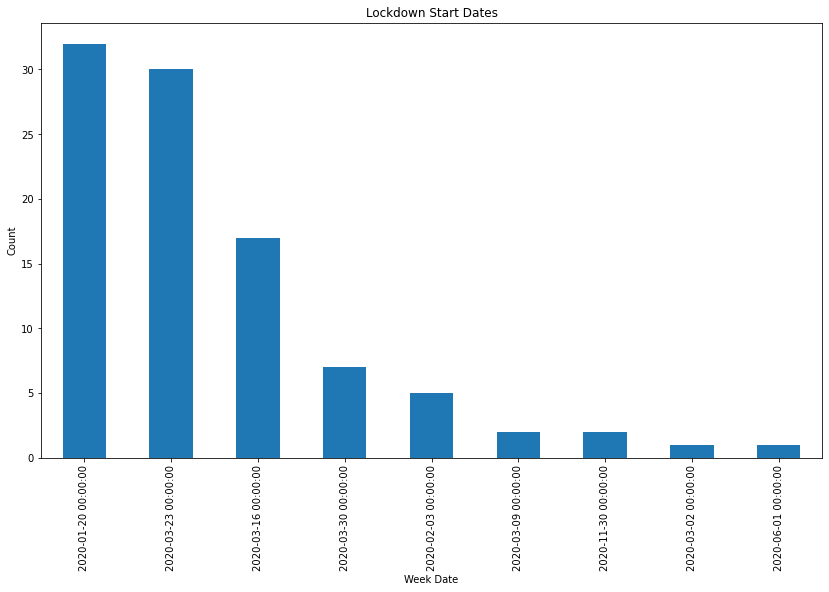

In [8]:
# Plot based on count per week

ax = lockdown_dates['WeekDate'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Lockdown Start Dates")
ax.set_xlabel("Week Date")
ax.set_ylabel("Count")
plt.show()